In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os

# plot settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
%matplotlib inline

In [ ]:
DATA_PATH = os.path.join('..', 'data', 'auto-mpg.data')

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                'acceleration', 'model_year', 'origin', 'car_name']

# load data
df = pd.read_csv(DATA_PATH, delim_whitespace=True, names=column_names, 
                quotechar='"', skipinitialspace=True)

print("First 5 rows of data:")
df.head()

First 5 rows of data:


C:\Users\yurik\AppData\Local\Temp\ipykernel_27828\163920370.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(DATA_PATH, delim_whitespace=True, names=column_names,


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
DATA_PATH = os.path.join('..', 'data', 'auto-mpg.data')

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                'acceleration', 'model_year', 'origin', 'car_name']

df = pd.read_csv(DATA_PATH, delim_whitespace=True, names=column_names, 
                quotechar='"', skipinitialspace=True)

print("First 5 rows of data:")
df.head()

First 5 rows of data:


C:\Users\yurik\AppData\Local\Temp\ipykernel_27828\3680981550.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(DATA_PATH, delim_whitespace=True, names=column_names,


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
print("Information about the data:")
df.info()

print("\nStatistical characteristics:")
df.describe().round(2)

print("\nNumber of missing values:")
df.isnull().sum()

# check for incorrect values
print("\nCheck for incorrect values:")
for col in df.columns:
    if df[col].dtype == object and col != 'car_name':
        print(f"{col}: {df[col].unique()}")

Information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB

Statistical characteristics:

Number of missing values:

Check for incorrect values:
horsepower: ['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '7

In [ ]:
print(f"Data type of 'horsepower': {df['horsepower'].dtype}")

# fsdf data type is object convert to numeric
if df['horsepower'].dtype == object:
    print("Found incorrect values in 'horsepower'. Converting to numeric...")
    df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
    df['horsepower'].fillna(df['horsepower'].median(), inplace=True)
    print(f"After conversion: {df['horsepower'].dtype}")

# check number of unique values 2in categorical variables
print("\nNumber of unique values:")
for col in ['cylinders', 'model_year', 'origin']:
    print(f"{col}: {df[col].nunique()} ({df[col].unique()})")

Data type of 'horsepower': object
Found incorrect values in 'horsepower'. Converting to numeric...
After conversion: float64

Number of unique values:
cylinders: 5 ([8 4 6 3 5])
model_year: 13 ([70 71 72 73 74 75 76 77 78 79 80 81 82])
origin: 3 ([1 3 2])


C:\Users\yurik\AppData\Local\Temp\ipykernel_27828\342650126.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].median(), inplace=True)


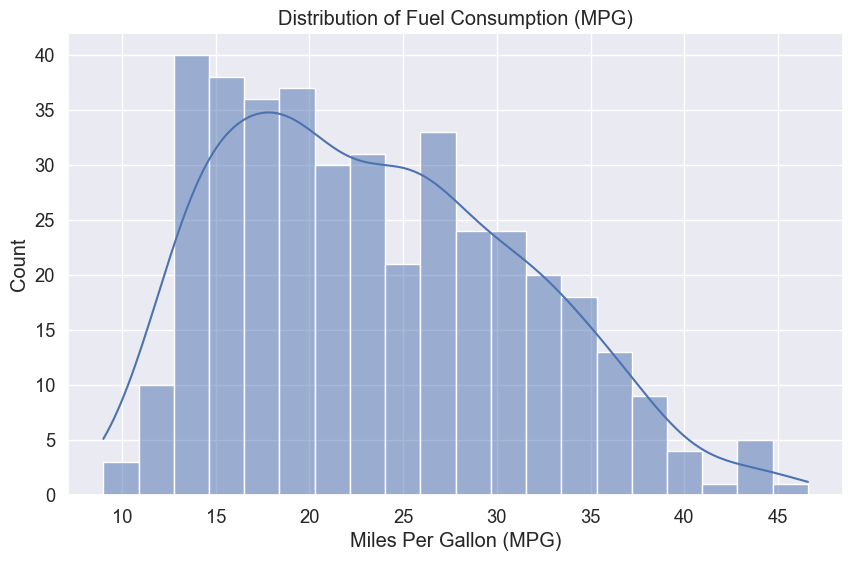

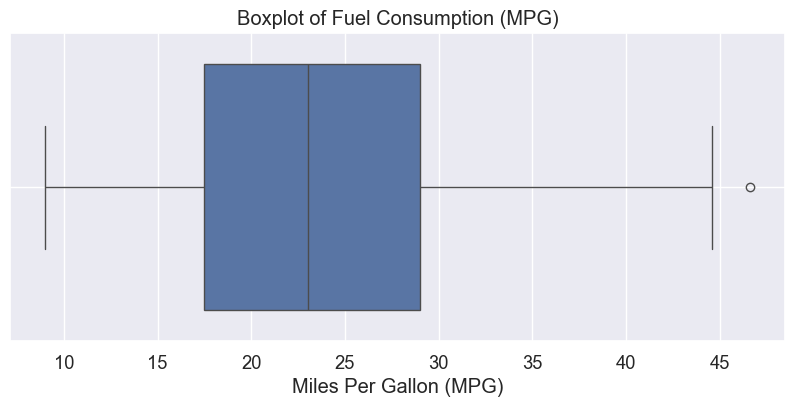

In [ ]:
# distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['mpg'], kde=True, bins=20)
plt.title('Distribution of Fuel Consumption (MPG)')
plt.xlabel('Miles Per Gallon (MPG)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# boxplot for target variable
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['mpg'])
plt.title('Boxplot of Fuel Consumption (MPG)')
plt.xlabel('Miles Per Gallon (MPG)')
plt.grid(True)
plt.show()

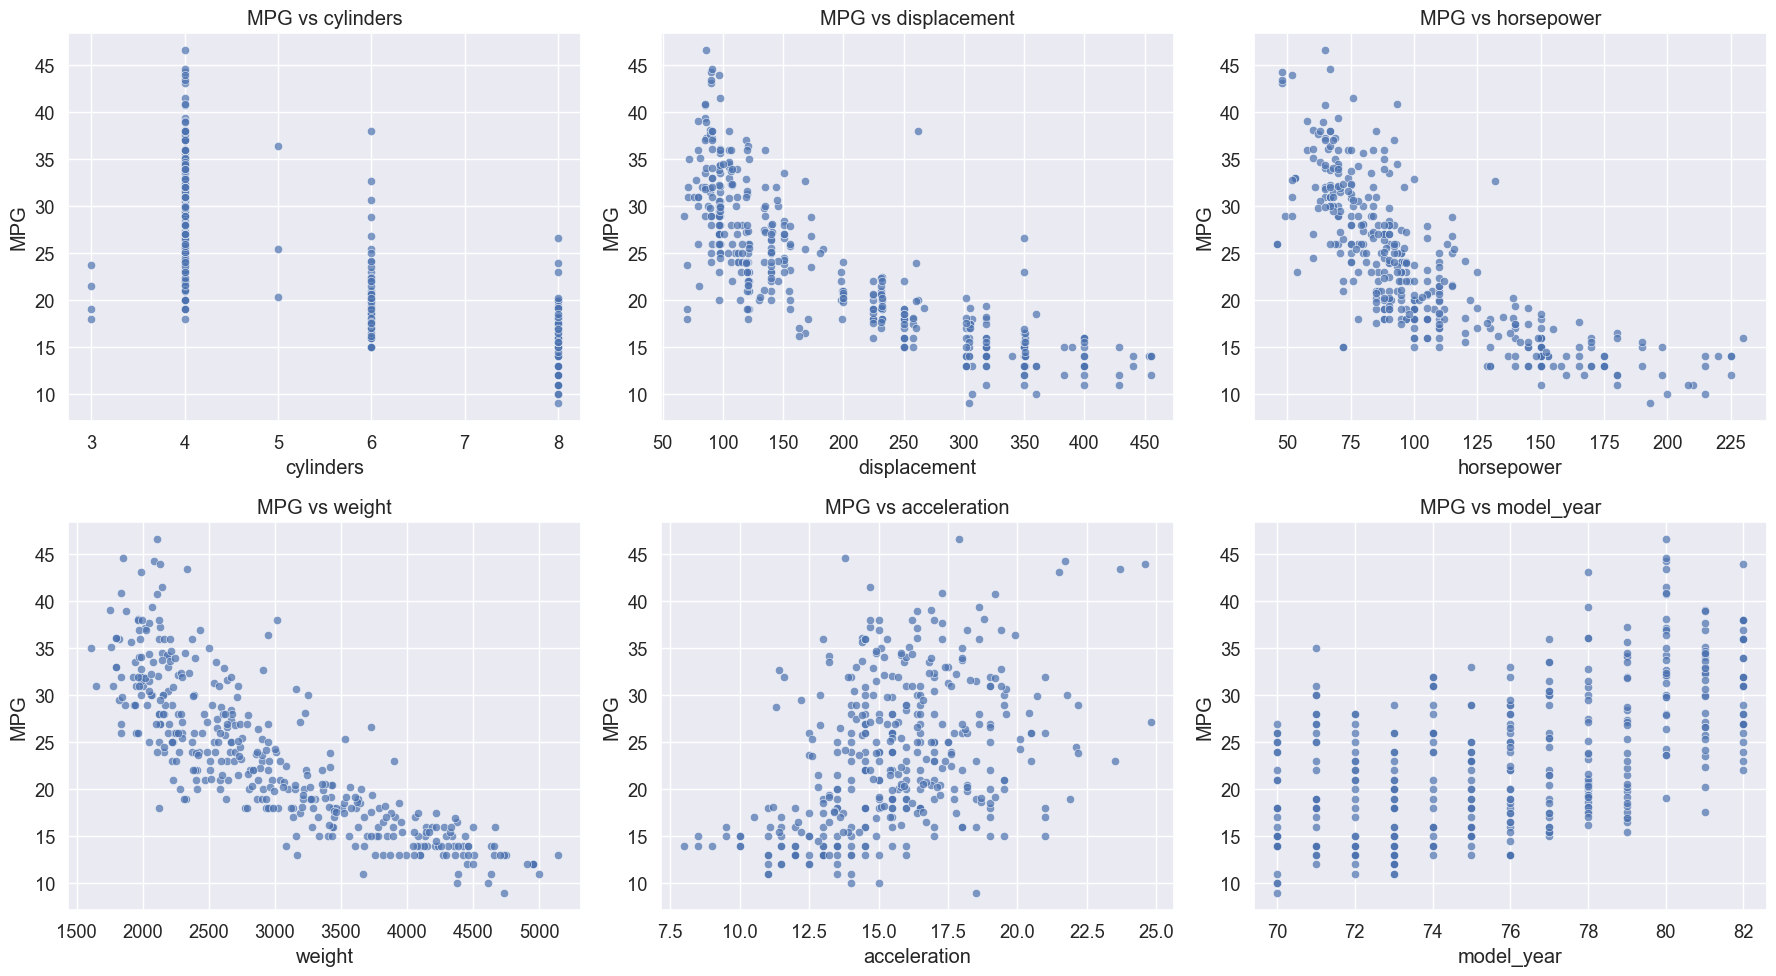

In [ ]:
# create grid of plots for numeric features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# list of numeric features
numeric_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

# create scatter plots
for i, feature in enumerate(numeric_features):
    sns.scatterplot(x=df[feature], y=df['mpg'], ax=axes[i], alpha=0.7)
    axes[i].set_title(f'MPG vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('MPG')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

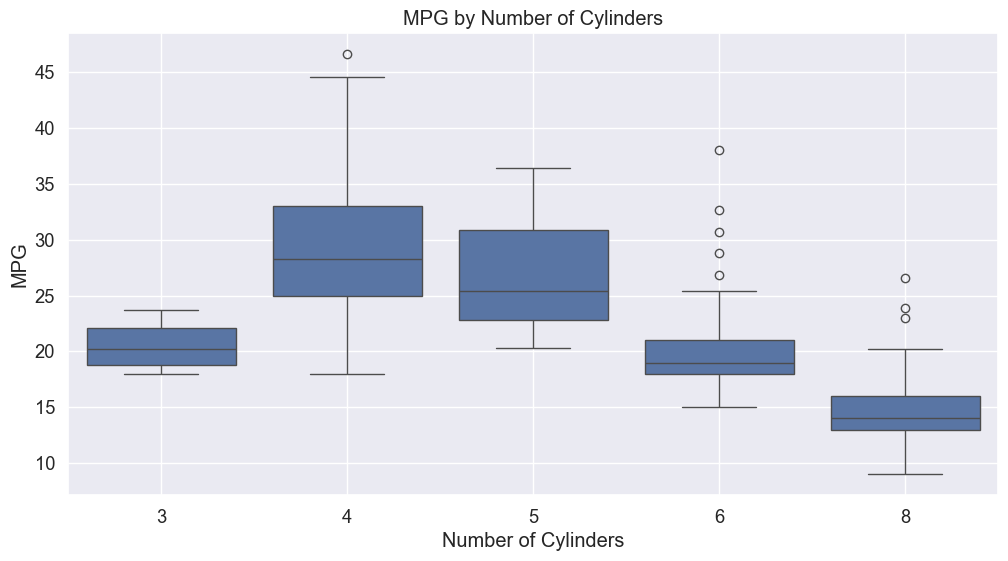

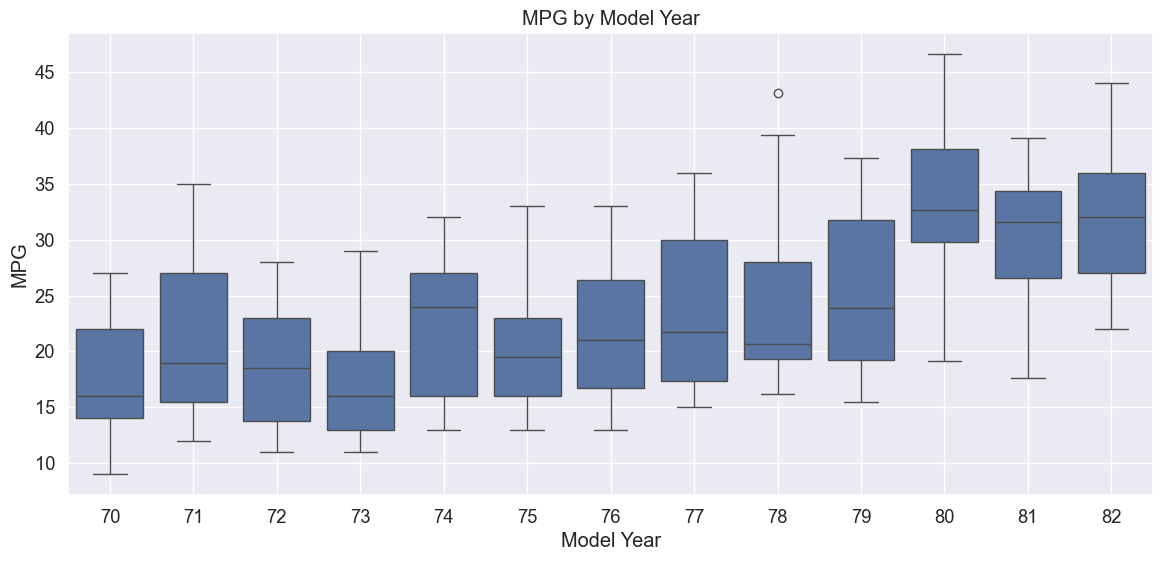

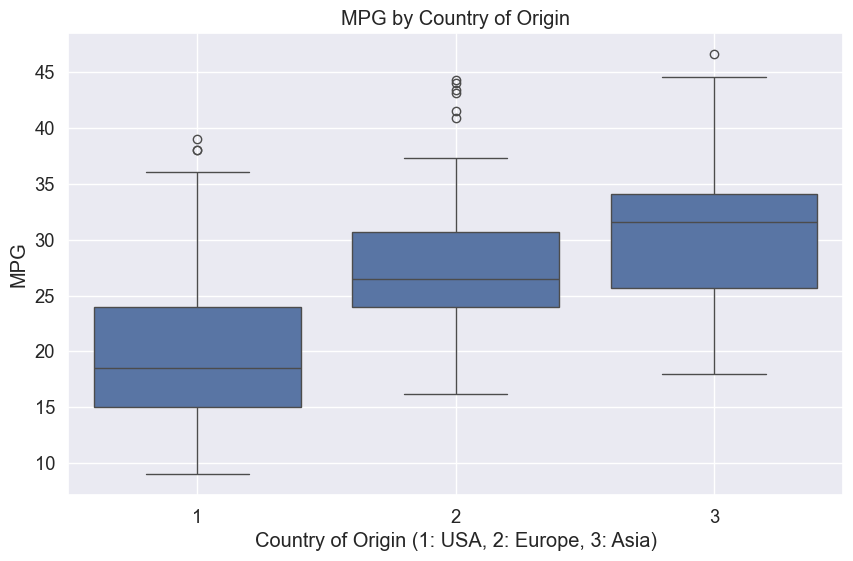

In [ ]:
# boxplot for MPG by number of cylinders
plt.figure(figsize=(12, 6))
sns.boxplot(x='cylinders', y='mpg', data=df)
plt.title('MPG by Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

# boxplot for MPG by model year
plt.figure(figsize=(14, 6))
sns.boxplot(x='model_year', y='mpg', data=df)
plt.title('MPG by Model Year')
plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

# boxplot for MPG by country of origin
plt.figure(figsize=(10, 6))
sns.boxplot(x='origin', y='mpg', data=df)
plt.title('MPG by Country of Origin')
plt.xlabel('Country of Origin (1: USA, 2: Europe, 3: Asia)')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

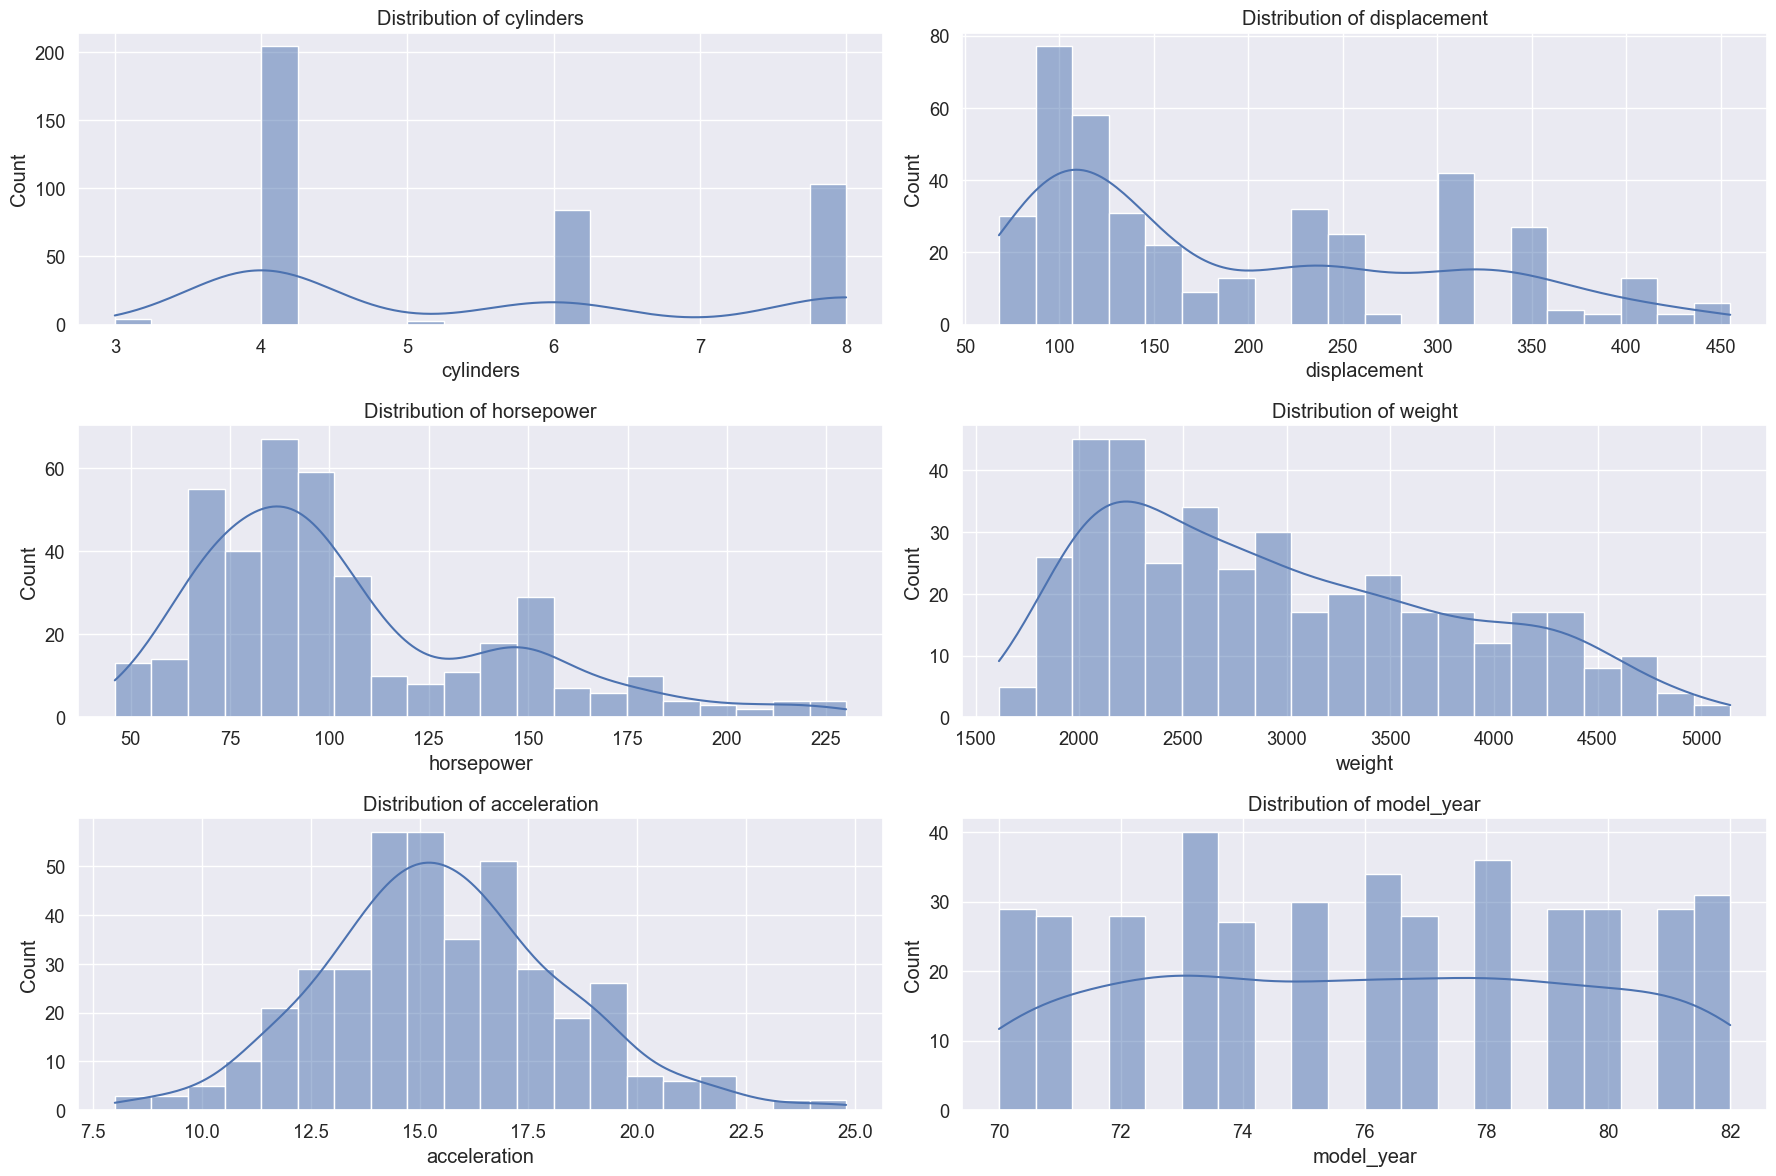

In [ ]:
# create histograms for all numeric features
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.histplot(df[feature], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

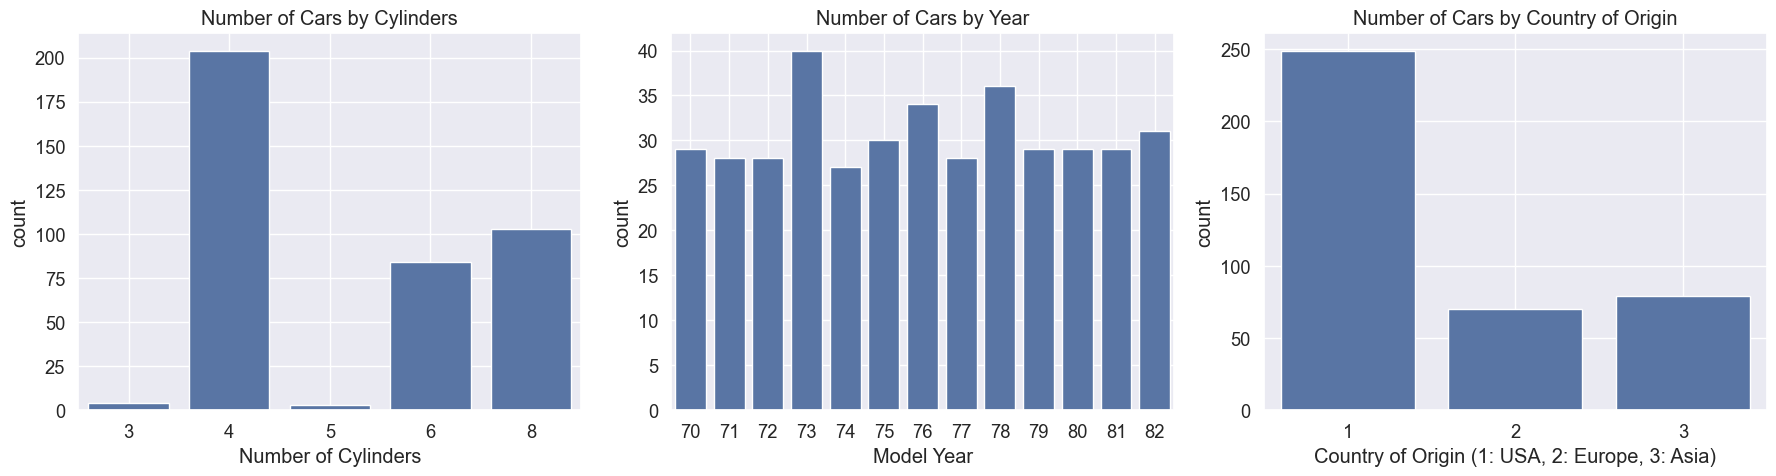

In [ ]:
# bar charts for categorical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# number of cars with different cylinder counts
sns.countplot(x='cylinders', data=df, ax=axes[0])
axes[0].set_title('Number of Cars by Cylinders')
axes[0].set_xlabel('Number of Cylinders')
axes[0].grid(True)

# number of cars by year
sns.countplot(x='model_year', data=df, ax=axes[1])
axes[1].set_title('Number of Cars by Year')
axes[1].set_xlabel('Model Year')
axes[1].grid(True)

# number of cars by country of origin
sns.countplot(x='origin', data=df, ax=axes[2])
axes[2].set_title('Number of Cars by Country of Origin')
axes[2].set_xlabel('Country of Origin (1: USA, 2: Europe, 3: Asia)')
axes[2].grid(True)

plt.tight_layout()
plt.show()

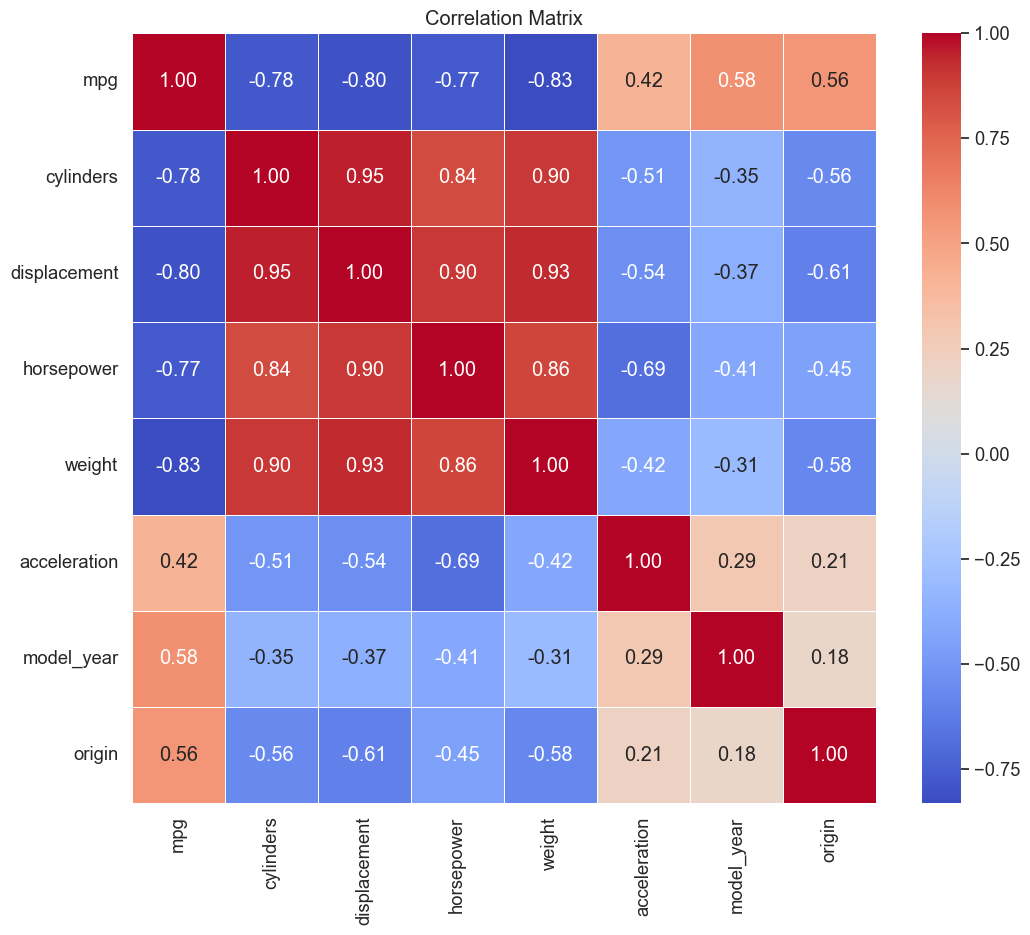

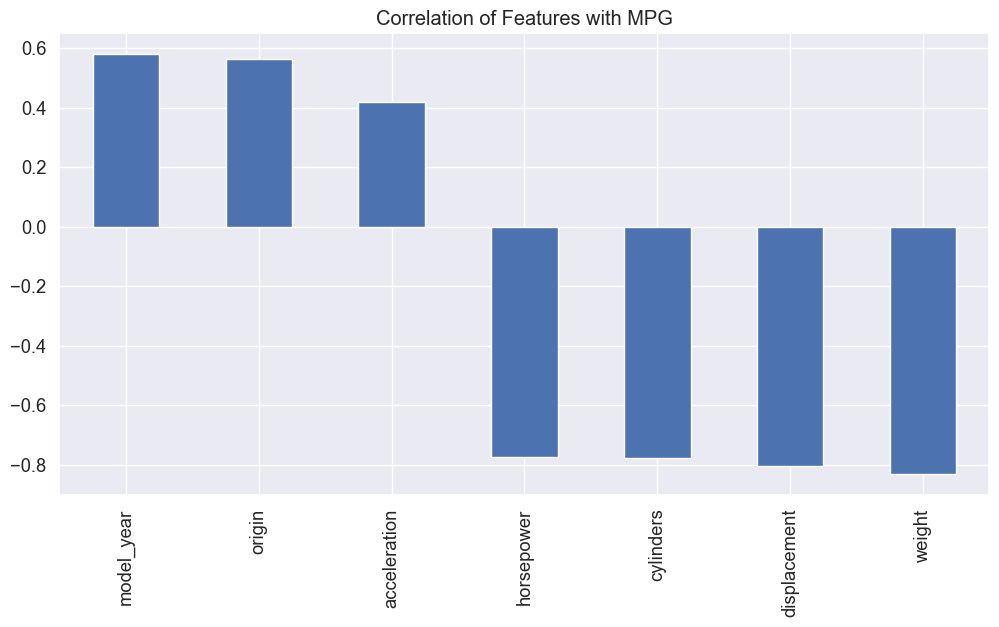

In [ ]:
# calculate correlations between numeric features
correlation = df.drop('car_name', axis=1).corr()

# correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# correlation of features with target variable MPG
plt.figure(figsize=(12, 6))
correlation_with_mpg = correlation['mpg'].sort_values(ascending=False)
correlation_with_mpg.drop('mpg').plot(kind='bar')
plt.title('Correlation of Features with MPG')
plt.grid(True)
plt.show()

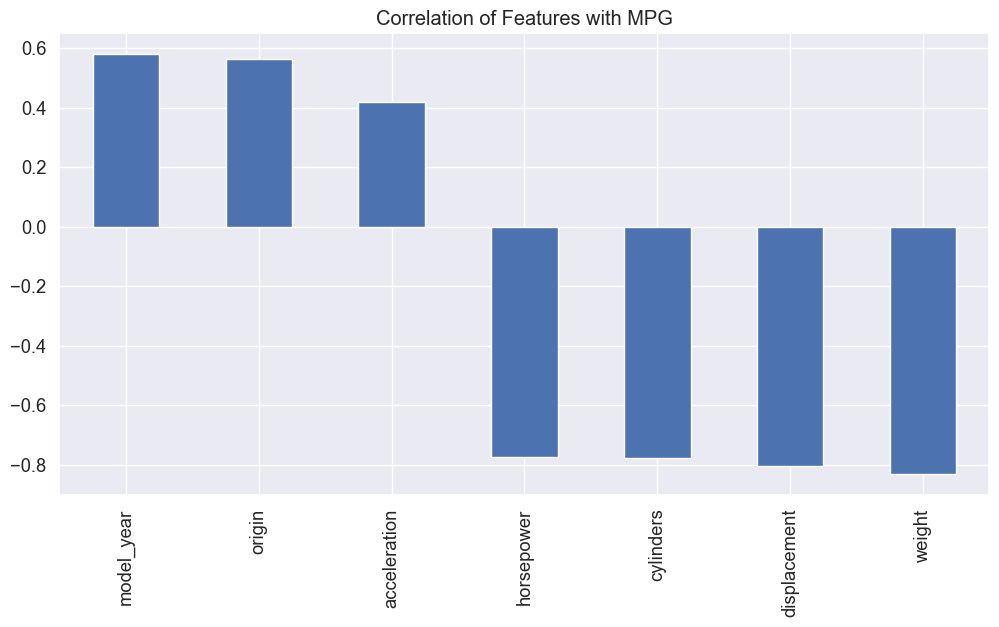

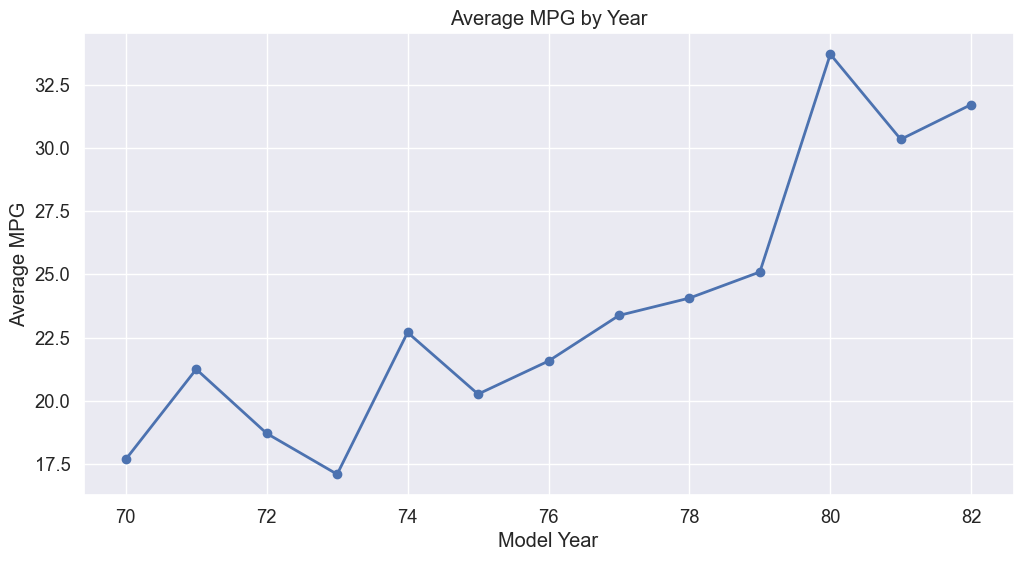

In [ ]:
# correlation of features with target variable MPG
plt.figure(figsize=(12, 6))
correlation_with_mpg = correlation['mpg'].sort_values(ascending=False)
correlation_with_mpg.drop('mpg').plot(kind='bar')
plt.title('Correlation of Features with MPG')
plt.grid(True)
plt.show()

# average MPG by year
plt.figure(figsize=(12, 6))
yearly_mpg = df.groupby('model_year')['mpg'].mean()
yearly_mpg.plot(kind='line', marker='o', linewidth=2)
plt.title('Average MPG by Year')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True)
plt.show()

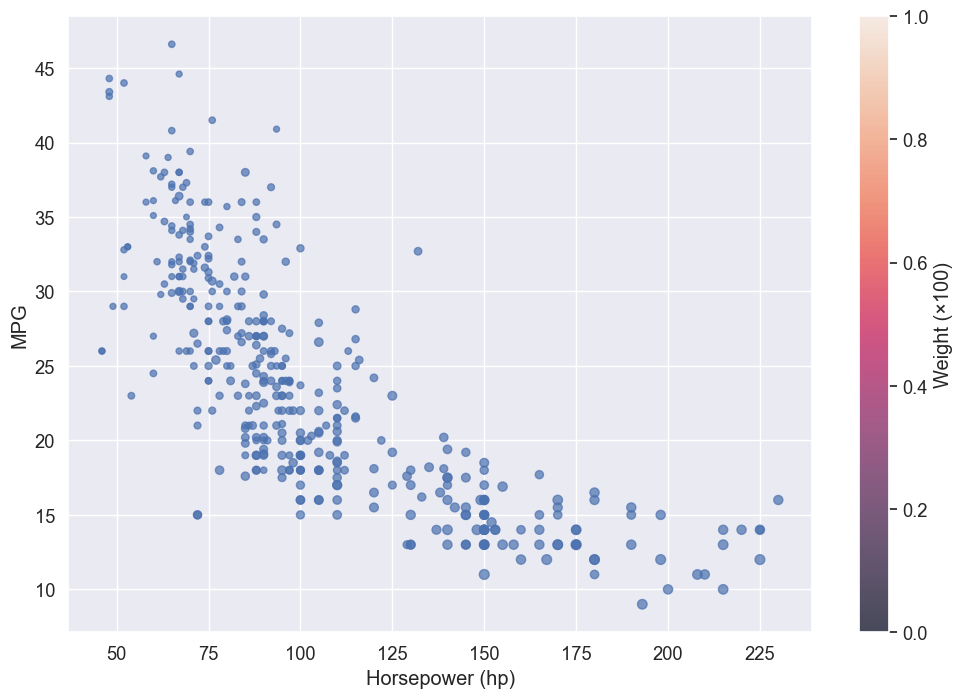

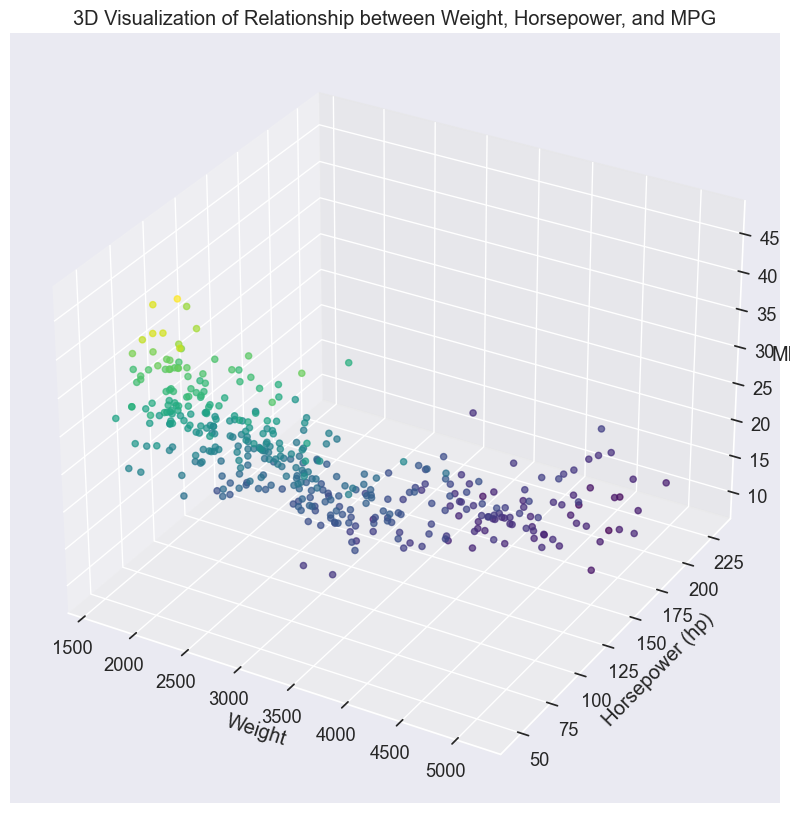

In [ ]:
#scatter plot with point size proportional to weight
plt.figure(figsize=(12, 8))
plt.scatter(df['horsepower'], df['mpg'], s=df['weight']/100, alpha=0.7)
plt.xlabel('Horsepower (hp)')
plt.ylabel('MPG')
plt.grid(True)
plt.colorbar(label='Weight (×100)')
plt.show()

# 3d visualization
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['weight'], df['horsepower'], df['mpg'], c=df['mpg'], cmap='viridis', alpha=0.7)
ax.set_xlabel('Weight')
ax.set_ylabel('Horsepower (hp)')
ax.set_zlabel('MPG')
ax.set_title('3D Visualization of Relationship between Weight, Horsepower, and MPG')
plt.show()

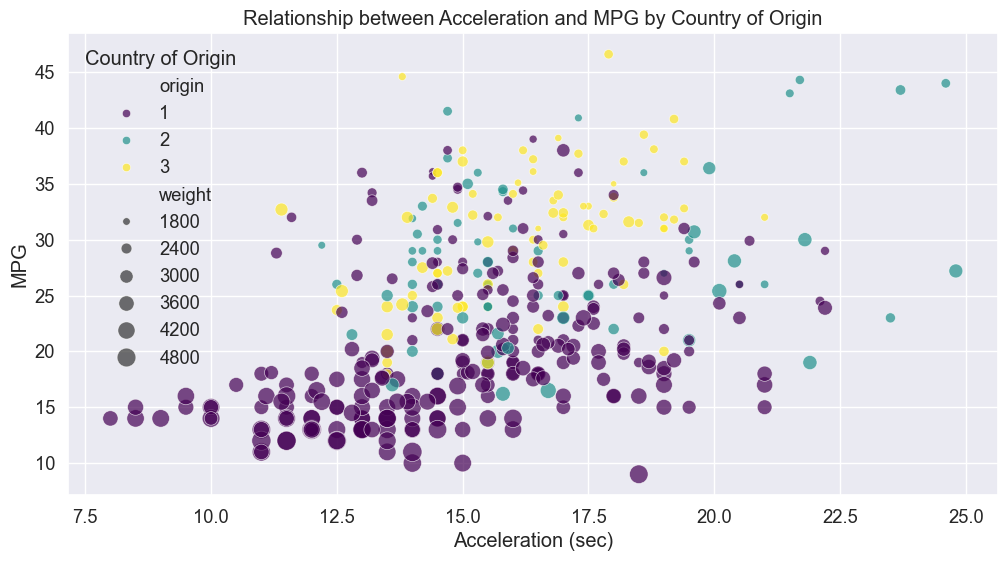

In [ ]:
# analysis of relationship between acceleration and MPG
plt.figure(figsize=(12, 6))
sns.scatterplot(x='acceleration', y='mpg', hue='origin', size='weight', sizes=(20, 200), data=df, palette='viridis', alpha=0.7)
plt.title('Relationship between Acceleration and MPG by Country of Origin')
plt.xlabel('Acceleration (sec)')
plt.ylabel('MPG')
plt.grid(True)
plt.legend(title='Country of Origin')
plt.show()

<Figure size 2000x1500 with 0 Axes>

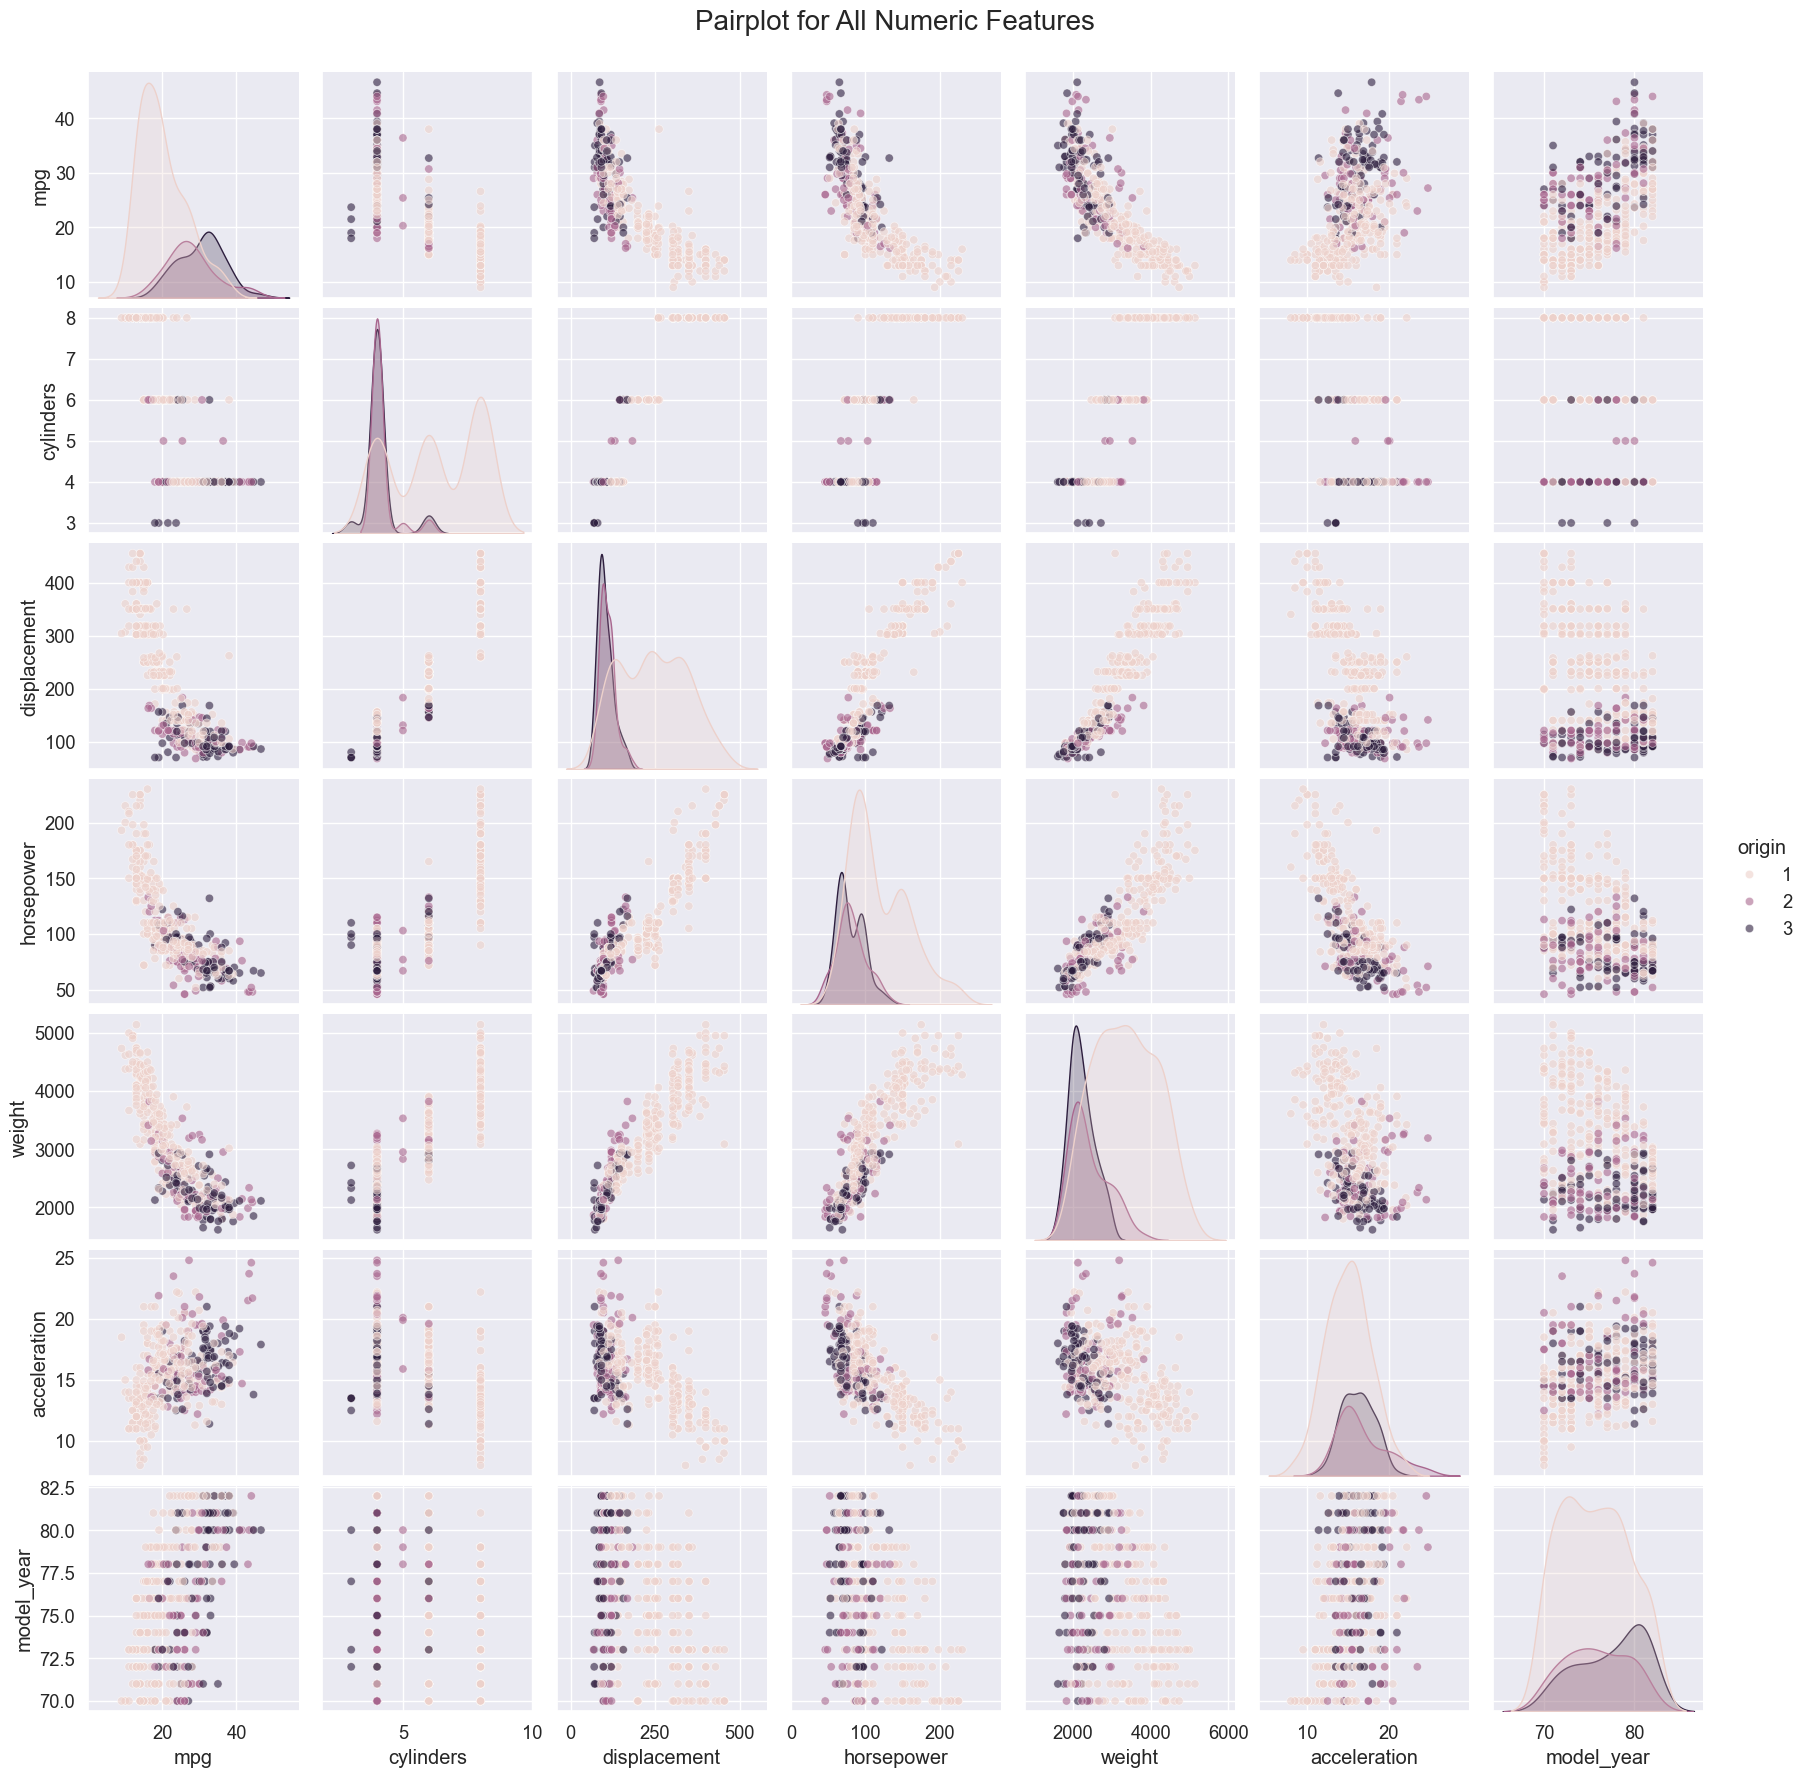

In [ ]:
# create pairplot for comprehensive relationship analysis
plt.figure(figsize=(20, 15))
sns.pairplot(df.drop('car_name', axis=1), hue='origin', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot for All Numeric Features', y=1.02, fontsize=20)
plt.show()